# Análisis Visual Covid

In [10]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('datos-covid-etareo.csv')

In [51]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Grupo de edad  3128 non-null   object
 1   Sexo           3128 non-null   object
 2   Fecha          3128 non-null   object
 3   Contagios      3128 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 97.9+ KB


In [18]:
df2 = df.groupby('Fecha').sum()
df2

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_5836\173318887.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby('Fecha').sum()


,Contagios
Fecha,
2020-03-25,1012
2020-03-26,1252
2020-03-27,1434
2020-03-28,1723
2020-03-29,1906
...,...
2020-10-30,561152
2020-11-02,566515
2020-11-06,572664


In [22]:
df2.reset_index(inplace=True)
df2

,Fecha,Contagios
0,2020-03-25,1012
1,2020-03-26,1252
2,2020-03-27,1434
3,2020-03-28,1723
4,2020-03-29,1906
...,...,...
87,2020-10-30,561152
88,2020-11-02,566515
89,2020-11-06,572664
90,2020-11-09,577877


### Evolución de contagiados por día

In [23]:
df2 = df.groupby('Fecha').sum()
df2.reset_index(inplace=True)
df2.drop('Fecha',axis=1, inplace=True)
df2

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_5836\1276925591.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby('Fecha').sum()


,Contagios
0,1012
1,1252
2,1434
3,1723
4,1906
...,...
87,561152
88,566515
89,572664
90,577877


In [24]:
df2.head()

,Contagios
0,1012
1,1252
2,1434
3,1723
4,1906


### Gráfico utilizando las funciones pyplot

Text(0, 0.5, 'Cantidad de contagiados')

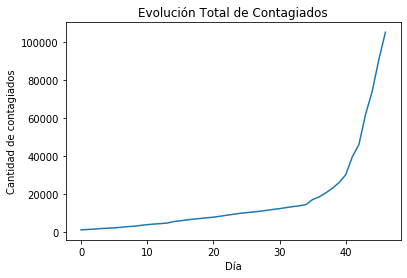

In [16]:
plt.plot(df2)
plt.title('Evolución Total de Contagiados')
plt.xlabel('Día')
plt.ylabel('Cantidad de contagiados')

### Subgráficos

In [25]:
df_m = df[ df['Sexo']=='M' ].groupby('Fecha').sum()
df_m.reset_index(inplace=True)
df_m.drop('Fecha',axis=1, inplace=True)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_5836\113110711.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_m = df[ df['Sexo']=='M' ].groupby('Fecha').sum()


In [26]:
df_f = df[ df['Sexo']=='F' ].groupby('Fecha').sum()
df_f.reset_index(inplace=True)
df_f.drop('Fecha',axis=1, inplace=True)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_5836\3108114181.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_f = df[ df['Sexo']=='F' ].groupby('Fecha').sum()


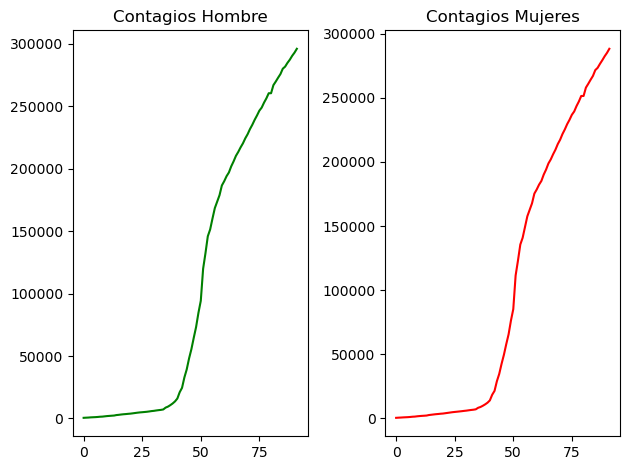

In [27]:
plt.subplot(1,2,1)
plt.plot(df_m, 'g')
plt.title('Contagios Hombre')

plt.subplot(1,2,2)
plt.plot(df_f, 'r')
plt.title('Contagios Mujeres')

plt.tight_layout()

### Graficando con orientacion a objetos

Text(0.5, 1.0, 'Total de Contagiados')

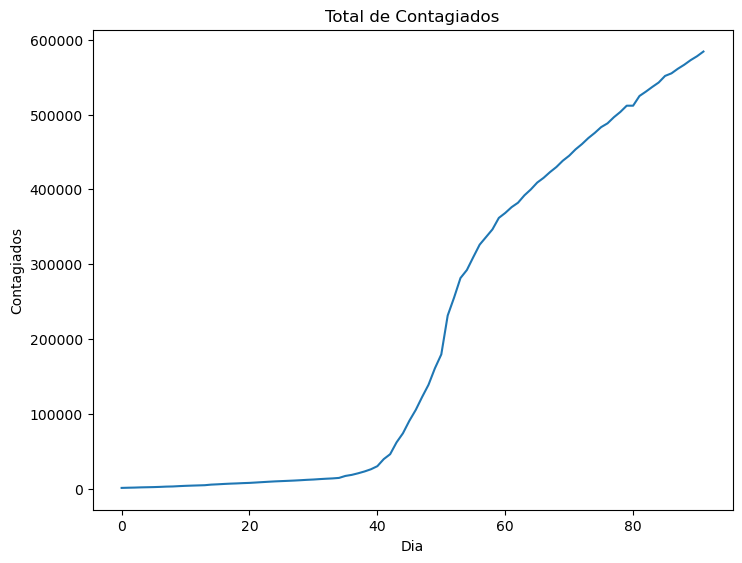

In [31]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(df2)
axes.set_xlabel('Dia')
axes.set_ylabel('Contagiados')
axes.set_title('Total de Contagiados')

### Posicionar varios ejes en un mismo gráfico

Text(0.5, 1.0, 'Mujeres')

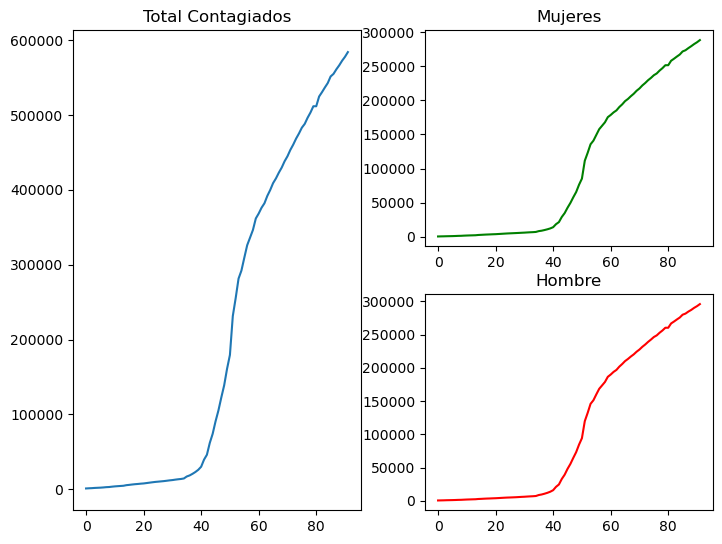

In [32]:
fig = plt.figure()
axes1 = fig.add_axes([0, 0, 0.45, 1])
axes2 = fig.add_axes([0.55, 0, 0.45, 0.45])
axes3 = fig.add_axes([0.55, 0.55, 0.45, 0.45])

axes1.plot(df2)
axes2.plot(df_m, 'r')
axes3.plot(df_f, 'g')

axes1.set_title('Total Contagiados')
axes2.set_title('Hombre')
axes3.set_title('Mujeres')


### Subplots (con orientación a objetos)

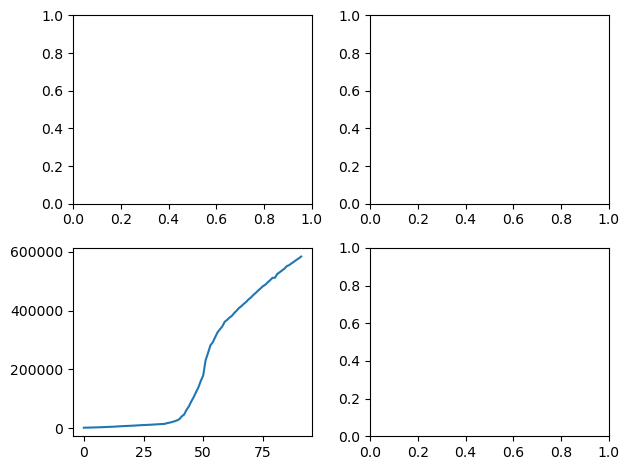

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[1][0].plot(df2)
fig.tight_layout()

### Graficar más de una serie

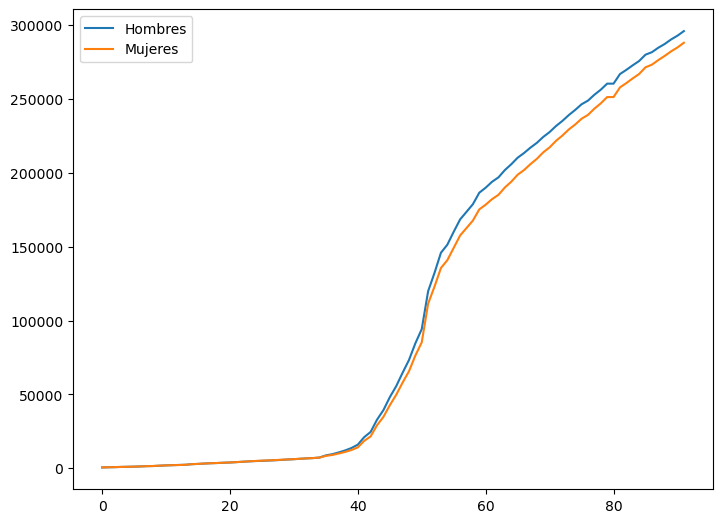

In [40]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(df_m, label='Hombres')
axes.plot(df_f, label='Mujeres')
axes.legend(loc=0)

In [54]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot('df_m, label='Hombres'','df_f, label='Mujeres'')
axes.legend(loc=0)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4206336392.py, line 3)

### Guardar un grafico como imagen

In [41]:
fig.savefig('mi-grafico.png', dpi=200)

### Apariencia

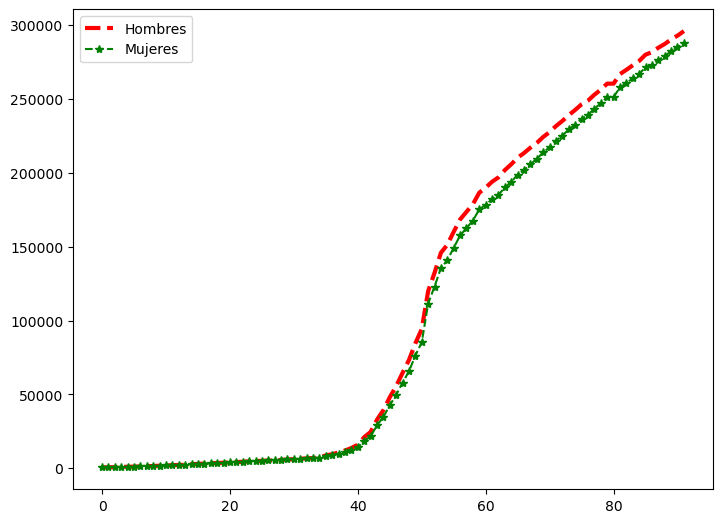

In [42]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(df_m, label='Hombres', color='red', linestyle='dashed', linewidth=3)
axes.plot(df_f, label='Mujeres', c='g', ls='--', marker='*')
axes.legend(loc=0)

### Zoom al gráfico

(1000.0, 20000.0)

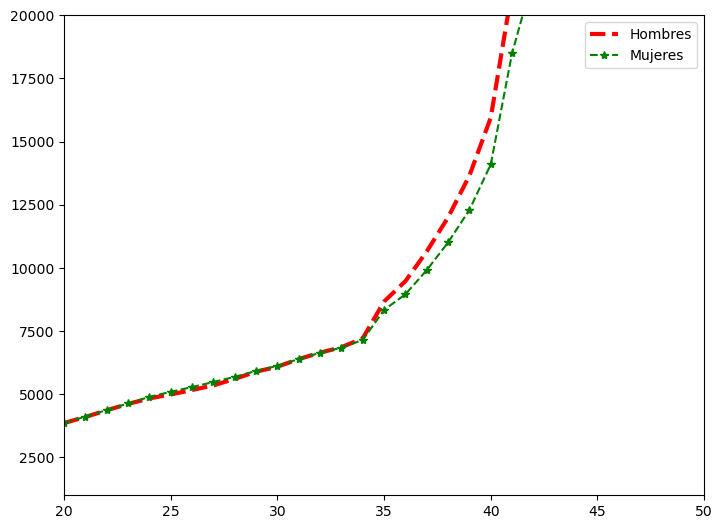

In [43]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(df_m, label='Hombres', color='red', linestyle='dashed', linewidth=3)
axes.plot(df_f, label='Mujeres', c='g', ls='--', marker='*')
axes.legend(loc=0)
axes.set_xlim([20,50])
axes.set_ylim([1000,20000])

## Tipos de Gráfico

In [44]:
dfs = pd.read_csv('Salaries.csv')
dfs.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


### A. Diagrama de Dispersión

Text(0, 0.5, 'Benefits')

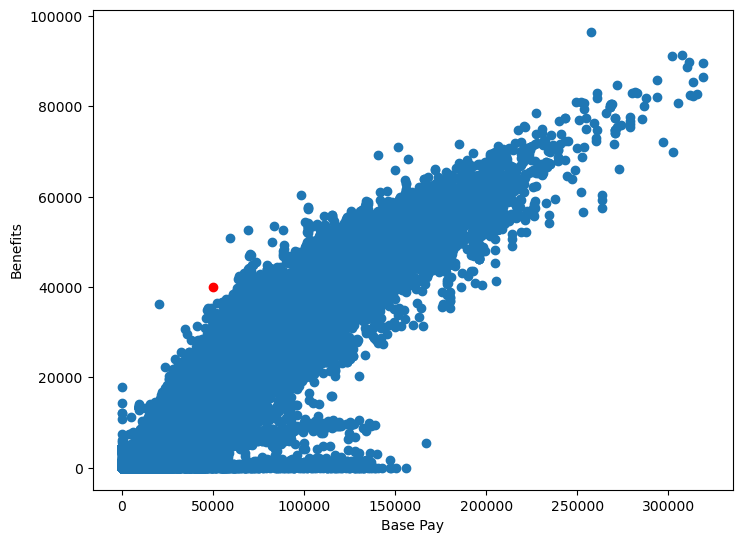

In [45]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.scatter( dfs['BasePay'], dfs['Benefits'] )
axes.scatter( 50000, 40000, color='red' )
axes.set_xlabel('Base Pay')
axes.set_ylabel('Benefits')

### B. Histograma

(array([2.5240e+04, 1.0758e+04, 1.0664e+04, 2.4549e+04, 2.4469e+04,
        1.6673e+04, 1.2990e+04, 1.1519e+04, 5.9020e+03, 1.9260e+03,
        1.3770e+03, 1.1630e+03, 5.0700e+02, 1.4400e+02, 6.8000e+01,
        3.1000e+01, 3.4000e+01, 1.4000e+01, 7.0000e+00, 1.0000e+01]),
 array([-1.66010000e+02,  1.58060410e+04,  3.17780920e+04,  4.77501430e+04,
         6.37221940e+04,  7.96942450e+04,  9.56662960e+04,  1.11638347e+05,
         1.27610398e+05,  1.43582449e+05,  1.59554500e+05,  1.75526551e+05,
         1.91498602e+05,  2.07470653e+05,  2.23442704e+05,  2.39414755e+05,
         2.55386806e+05,  2.71358857e+05,  2.87330908e+05,  3.03302959e+05,
         3.19275010e+05]),
 <BarContainer object of 20 artists>)

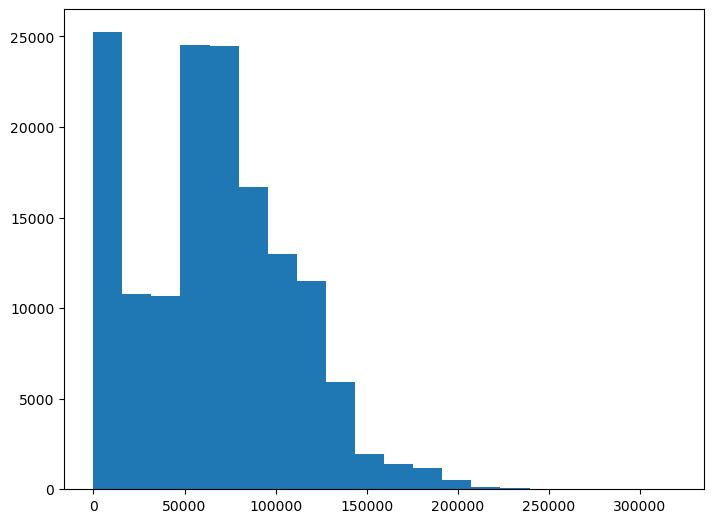

In [46]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.hist( dfs['BasePay'].dropna(), bins=20 )

### C. Diagrama de Cajas

{'whiskers': [<matplotlib.lines.Line2D at 0x203b8147430>,
 'caps': [<matplotlib.lines.Line2D at 0x203b8147850>,
 'boxes': [<matplotlib.lines.Line2D at 0x203b8147190>],
 'medians': [<matplotlib.lines.Line2D at 0x203b8147d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x203b8184070>],
 'means': []}

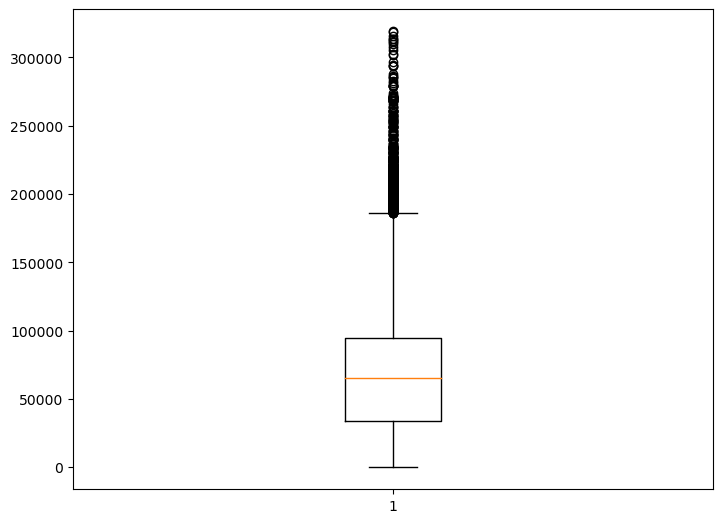

In [47]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.boxplot( dfs['BasePay'].dropna() )

### D. Diagrama de Barras

In [48]:
df.head(2)

,Grupo de edad,Sexo,Fecha,Contagios
0,00 - 04 años,M,2020-03-25,4
1,05 - 09 años,M,2020-03-25,2


In [49]:
df3 = df[ df['Fecha']==df['Fecha'].max() ].groupby('Grupo de edad').sum()

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_5836\140591447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df[ df['Fecha']==df['Fecha'].max() ].groupby('Grupo de edad').sum()


In [50]:
df3.index

Index(['00 - 04 años', '05 - 09 años', '10 - 14 años', '15 - 19 años',
       '20 - 24 años', '25 - 29 años', '30 - 34 años', '35 - 39 años',
       '40 - 44 años', '45 - 49 años', '50 - 54 años', '55 - 59 años',
       '60 - 64 años', '65 - 69 años', '70 - 74 años', '75 - 79 años',
       '80 y más años'],
      dtype='object', name='Grupo de edad')

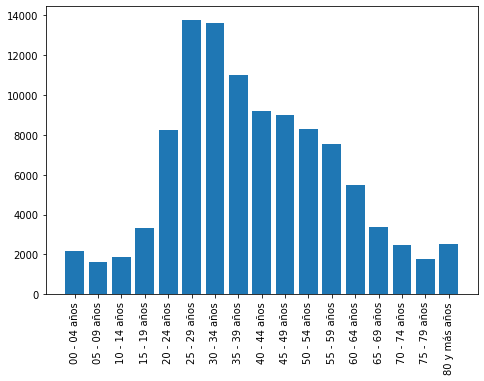

In [98]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(df3.index, df3['Contagiados'])
axes.tick_params(axis='x', labelrotation=90)

### E. Diagrama de Torta

C:\Users\jsepulveda\Anaconda3\envs\dataanalysis\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


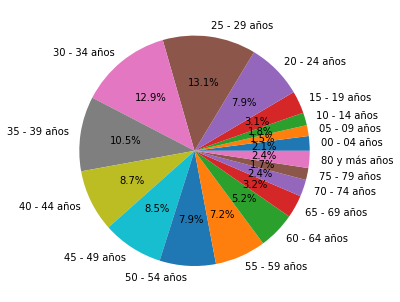

In [102]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.pie(df3['Contagiados'], labels=df3.index, autopct='%1.1f%%' )
fig.show()

### Estilos

In [104]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [105]:
plt.style.use('bmh')

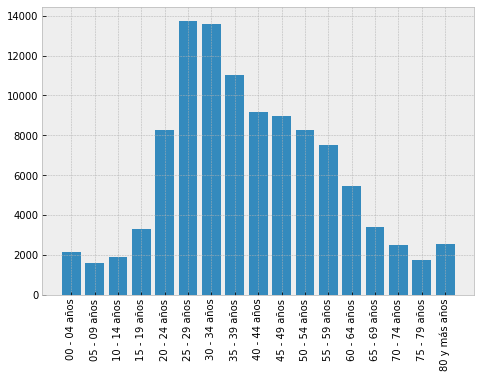

In [106]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(df3.index, df3['Contagiados'])
axes.tick_params(axis='x', labelrotation=90)

In [107]:
plt.style.use('fivethirtyeight')

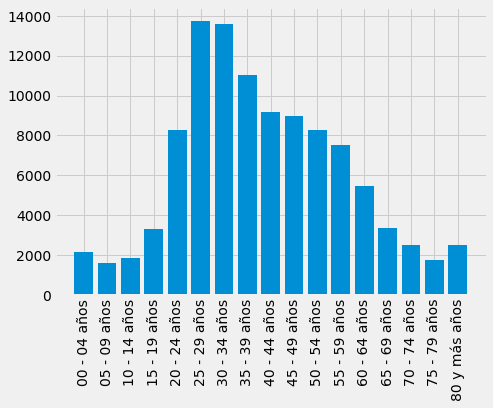

In [108]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(df3.index, df3['Contagiados'])
axes.tick_params(axis='x', labelrotation=90)

In [109]:
plt.style.use('ggplot')

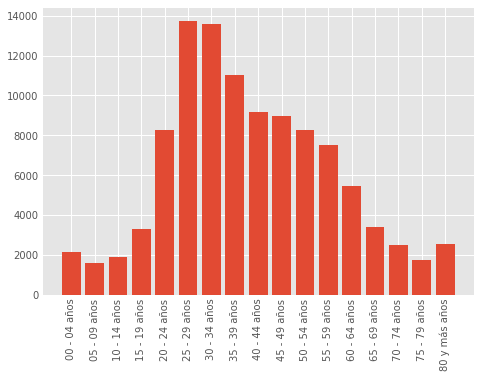

In [110]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(df3.index, df3['Contagiados'])
axes.tick_params(axis='x', labelrotation=90)

In [111]:
plt.style.use('seaborn')

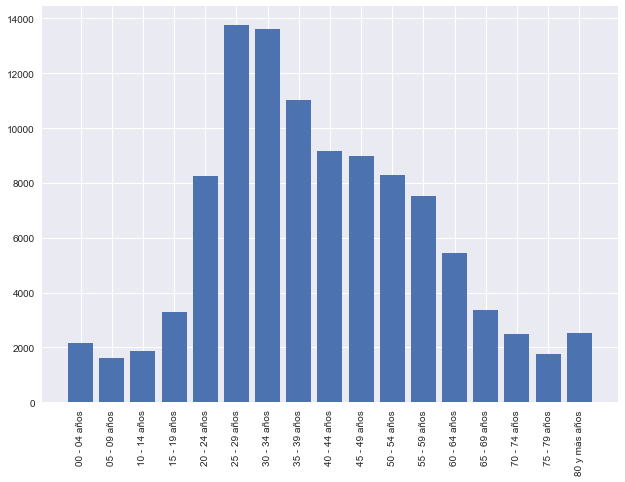

In [112]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(df3.index, df3['Contagiados'])
axes.tick_params(axis='x', labelrotation=90)